## Biblioteca importadas

In [79]:

import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt




## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [80]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [81]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [82]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [83]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [84]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [85]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [86]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [87]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)

#### Inflação do turismo no Brasil

In [88]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [89]:
filename = r'C:Dados macros\PIB_brasil_freq.xlsx'
pib = pd.read_excel(filename)

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [90]:
principal_cwb =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )


#### Correlação entre os dados pré selecionados 

In [92]:
principal_cwb.loc[principal_cwb["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2020]

principal_cwb.corr()


,Ano,Passageiros,Passageiros_freq,numero,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,-0.296982,-0.368920,0.825633,0.537493,0.498046,0.462911,-0.379601,-0.313397
Passageiros,-0.296982,1.000000,0.092457,-0.063254,0.159826,0.090478,-0.393514,-0.353917,0.498017
Passageiros_freq,-0.368920,0.092457,1.000000,-0.422203,-0.114829,-0.073021,-0.530997,-0.222893,0.431608
numero,0.825633,-0.063254,-0.422203,1.000000,0.747097,0.757172,0.089808,-0.283610,-0.192897
Passageiros internacionais,0.537493,0.159826,-0.114829,0.747097,1.000000,0.769081,-0.233850,-0.354779,0.176821
Oil,0.498046,0.090478,-0.073021,0.757172,0.769081,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,-0.393514,-0.530997,0.089808,-0.233850,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.353917,-0.222893,-0.283610,-0.354779,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,0.498017,0.431608,-0.192897,0.176821,0.289631,-0.483029,-0.353883,1.000000


#### Análise grafica

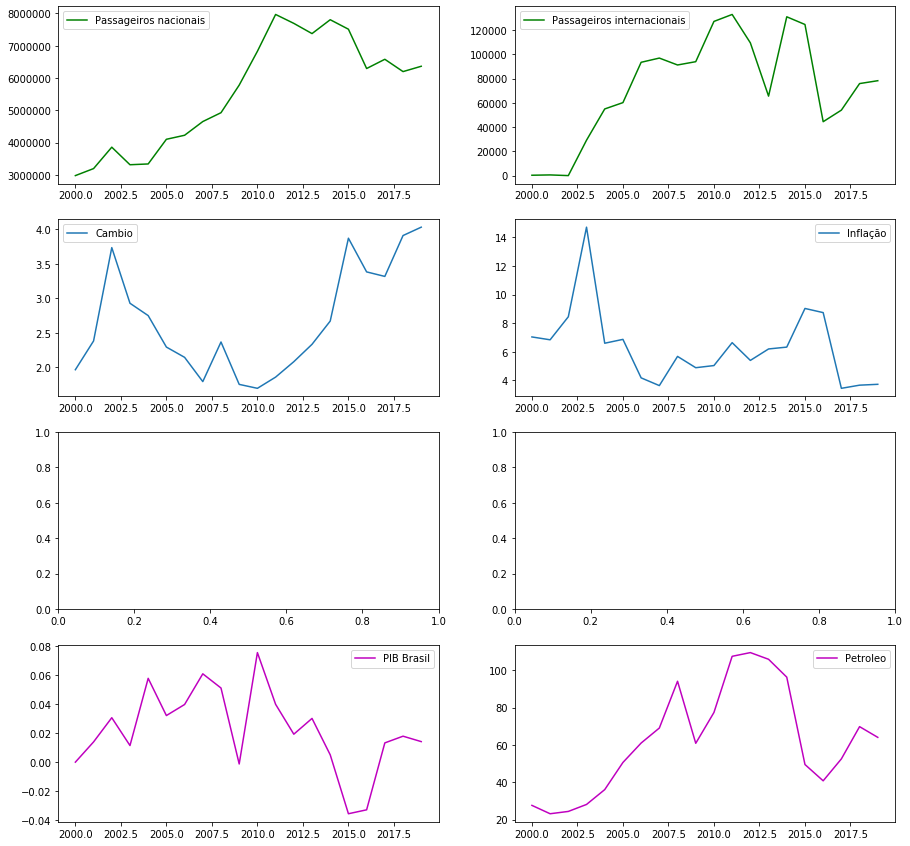

In [14]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_cwb["Ano"], principal_cwb["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_cwb["Ano"], principal_cwb["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_cwb["Ano"], principal_cwb["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [93]:
treino = principal_cwb.loc[principal_cwb["Ano"] < 2017]
teste = principal_cwb.loc[principal_cwb["Ano"] >= 2000]

In [94]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano","numero"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano", "numero"],axis=1).copy()

In [95]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [-4.98812065e-01 -1.63304931e-03 -4.96795192e-02 -2.28832654e-02
  1.72120198e+00]
0.4190908701366786
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.08043747705890643


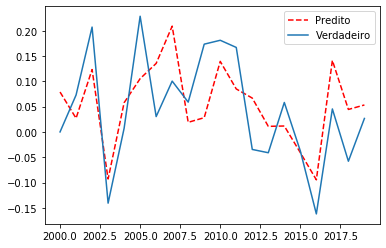

In [96]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [97]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [98]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [99]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.08009224432818128


In [100]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.08043747705890641


In [101]:
#ano_lista = np.arange(2017,2020,1)
#
#
#plt.plot(ano_lista,final_predictions ,'--r', label='Predito')
#plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
#plt.legend()
#plt.show()

In [102]:
import statsmodels.api as sm

#define response variable
y = principal_cwb["Passageiros"].loc[principal_cwb["Ano"]<2020]

#define predictor variables
x = principal_cwb.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_cwb["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2.166
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.114
Time:                        20:10:50   Log-Likelihood:                 23.362
No. Observations:                  20   AIC:                            -32.72
Df Residuals:                      13   BIC:                            -25.75
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3691      0.195  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [25]:
principal_igu =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [26]:
principal_igu.loc[principal_igu["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_igu = principal_igu.loc[principal_igu["Ano"]<2020]

principal_igu.corr()
principal_igu

,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
0,2000,456034,-0.097304,2942,27.60,1.9678,7.04,0.000000
1,2001,411660,0.030627,509,23.12,2.3840,6.84,0.013899
2,2002,424268,0.073331,14,24.36,3.7342,8.45,0.030535
3,2003,455380,0.253669,1098,28.10,2.9293,14.71,0.011408
4,2004,570896,0.386776,22018,36.05,2.7508,6.60,0.057600
5,2005,791705,-0.095600,28150,50.59,2.2957,6.87,0.032021
6,2006,716018,-0.011811,12492,61.00,2.1470,4.18,0.039620
7,2007,707561,0.038507,59,69.04,1.7959,3.64,0.060699
8,2008,734807,0.089852,1069,94.10,2.3690,5.68,0.050942
9,2009,800831,0.407859,1408,60.86,1.7557,4.89,-0.001258


##### Análise grafica

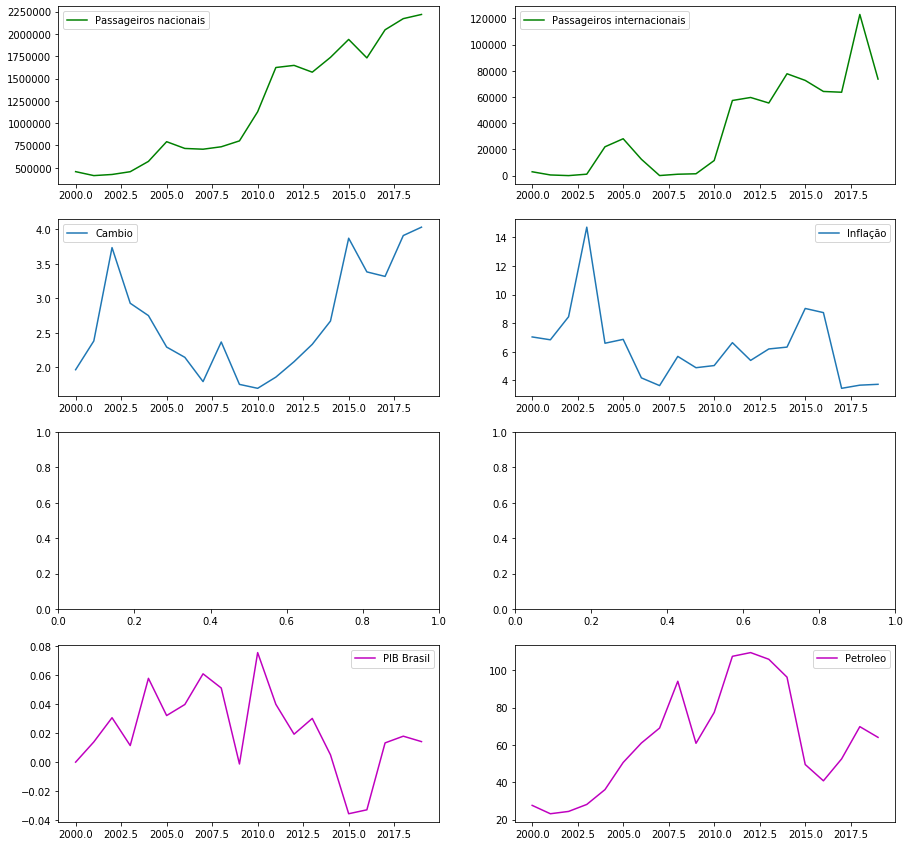

In [27]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_igu["Ano"], principal_igu["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_igu["Ano"], principal_igu["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_igu["Ano"], principal_igu["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_igu["Ano"], principal_igu["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()
#
ax[3,0].plot(principal_igu["Ano"], principal_igu["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_igu["Ano"], principal_igu["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [28]:
treino = principal_igu.loc[principal_igu["Ano"] < 2017]
teste = principal_igu.loc[principal_igu["Ano"] >= 2000]

In [29]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()

In [30]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [  290750.25046804    15742.58133802   301844.82722287   -23634.22135687
 -9387676.61129749]
-353031.65321974596
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 322373.80948743323


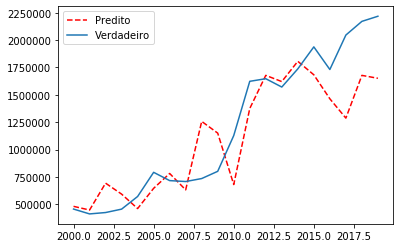

In [31]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_igu["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [32]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [33]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [34]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 234870.7381811042


In [35]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 322373.80948743323


In [36]:
import statsmodels.api as sm

#define response variable
y = principal_igu["Passageiros"].loc[principal_igu["Ano"]<2020]

#define predictor variables
x = principal_igu.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_igu["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     14.45
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.20e-05
Time:                        19:42:25   Log-Likelihood:                -277.44
No. Observations:                  20   AIC:                             566.9
Df Residuals:                      14   BIC:                             572.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.175e+05   4.95e+05  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [37]:
principal_nvt =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [38]:
 
principal_nvt = principal_nvt.loc[principal_nvt["Ano"]<2020]

principal_nvt.corr()
principal_nvt

,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
0,2000,861385,-0.299965,0,27.60,1.9678,7.04,0.000000
1,2001,603000,-0.208972,0,23.12,2.3840,6.84,0.013899
2,2002,476990,-0.330665,0,24.36,3.7342,8.45,0.030535
3,2003,319266,0.157270,0,28.10,2.9293,14.71,0.011408
4,2004,369477,0.311770,366,36.05,2.7508,6.60,0.057600
5,2005,484669,-0.082679,4041,50.59,2.2957,6.87,0.032021
6,2006,444597,-0.096661,2087,61.00,2.1470,4.18,0.039620
7,2007,401622,-0.098961,0,69.04,1.7959,3.64,0.060699
8,2008,361877,0.706666,0,94.10,2.3690,5.68,0.050942
9,2009,617603,0.462831,0,60.86,1.7557,4.89,-0.001258


##### Análise grafica

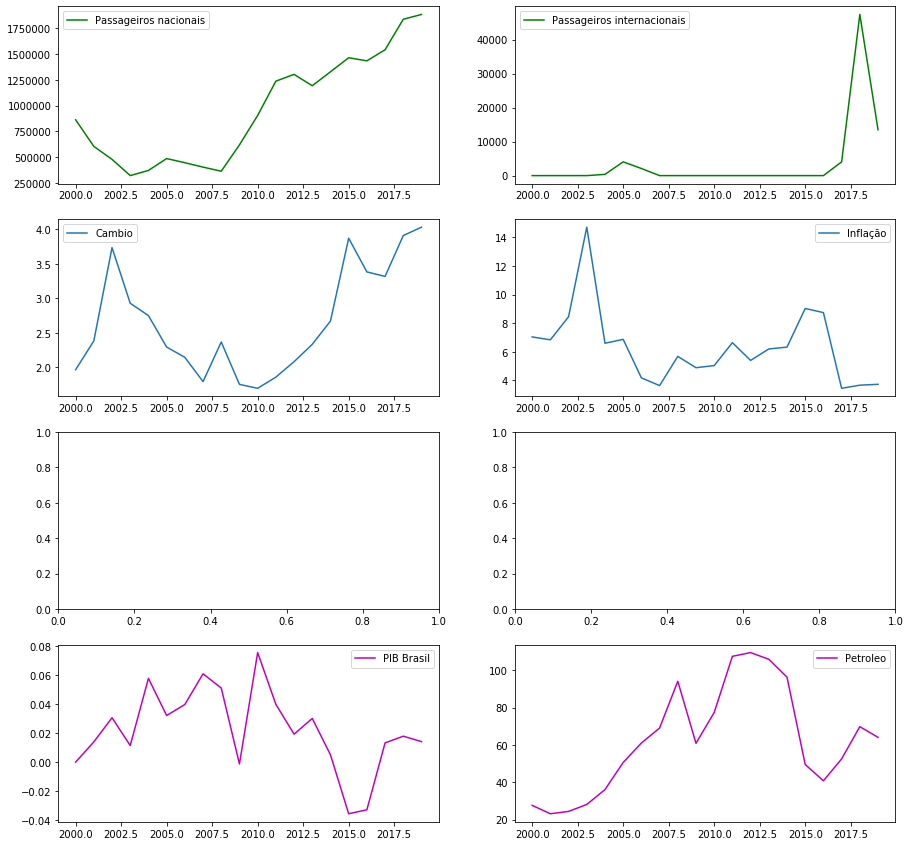

In [39]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_nvt["Ano"], principal_nvt["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_nvt["Ano"], principal_nvt["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_nvt["Ano"], principal_nvt["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_nvt["Ano"], principal_nvt["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

In [40]:
treino = principal_nvt.loc[principal_nvt["Ano"] < 2017]
teste = principal_nvt.loc[principal_nvt["Ano"] >= 2000]

In [41]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()

In [42]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [ -330959.09140729    10184.74823813   106118.53377024    -9905.8455949
 -8862111.36821916]
209886.1014466451
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 339289.1407318075


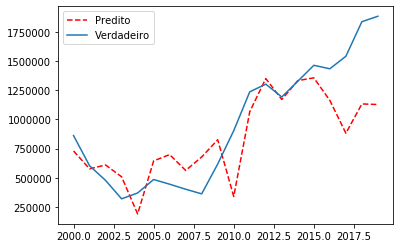

In [43]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_nvt["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [44]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [45]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [46]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 216628.80547537826


In [47]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 339289.1407318073


In [48]:
import statsmodels.api as sm

#define response variable
y = principal_nvt["Passageiros"].loc[principal_nvt["Ano"]<2020]

#define predictor variables
x = principal_nvt.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_nvt["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     9.452
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           0.000415
Time:                        19:42:26   Log-Likelihood:                -276.52
No. Observations:                  20   AIC:                             565.0
Df Residuals:                      14   BIC:                             571.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.594e+04   4.77e+0

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [49]:
principal_pmw =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [50]:
principal_pmw.loc[principal_pmw["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_pmw= principal_pmw.loc[principal_pmw["Ano"]<2020]
principal_pmw.corr()

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.942935,-0.228764,0.498046,0.462911,-0.379601,-0.313397
Passageiros,0.942935,1.000000,-0.326757,0.546518,0.365772,-0.344995,-0.399778
Passageiros_freq,-0.228764,-0.326757,1.000000,-0.229909,0.043137,0.733162,-0.048241
Oil,0.498046,0.546518,-0.229909,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,0.365772,0.043137,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.344995,0.733162,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,-0.399778,-0.048241,0.289631,-0.483029,-0.353883,1.000000


##### Análise grafica

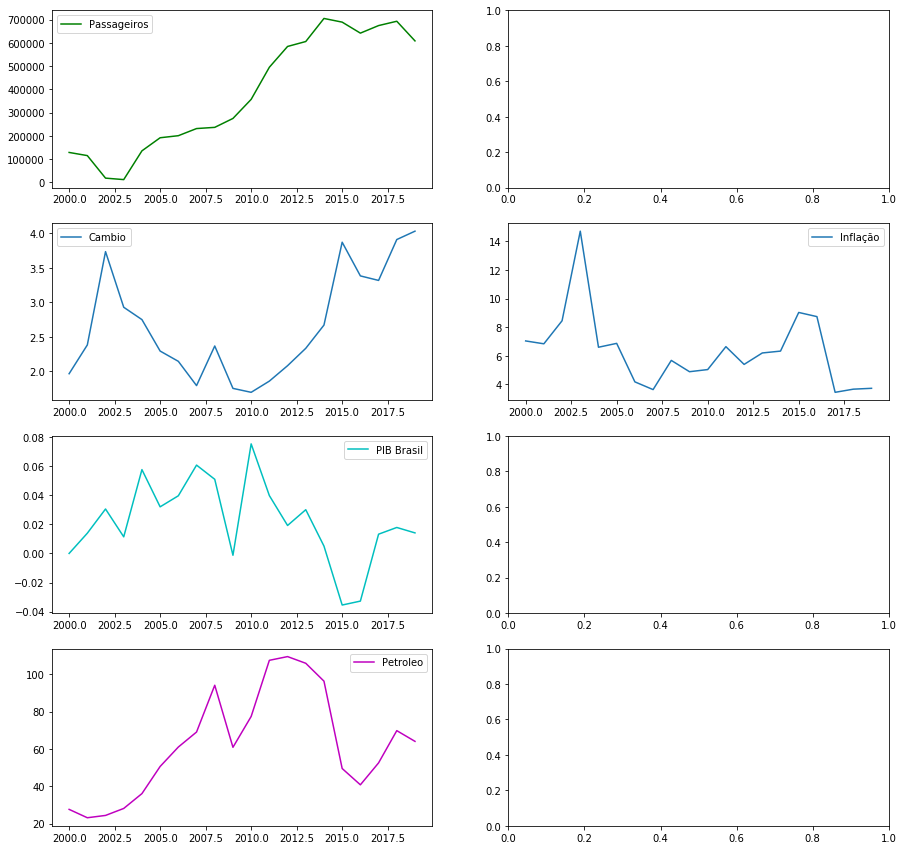

In [51]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_pmw["Ano"], principal_pmw["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[1,0].plot(principal_pmw["Ano"], principal_pmw["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_pmw["Ano"], principal_pmw["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal_pmw["Ano"], principal_pmw["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()#

In [52]:
treino = principal_pmw.loc[principal_pmw["Ano"] < 2017]
teste = principal_pmw.loc[principal_pmw["Ano"] >= 2000]

In [53]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano"],axis=1).copy()

In [54]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [-1.69491117e+04  6.51253646e+03  8.62736715e+04 -1.17534390e+03
 -4.14615053e+06]
-173415.3081893524
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 114272.56060921018


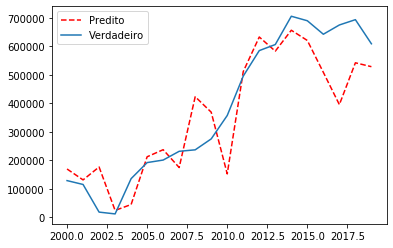

In [55]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_pmw["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [56]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [57]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [58]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 95126.64093613181


In [59]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 114272.5606092094


In [60]:
import statsmodels.api as sm

#define response variable
y = principal_pmw["Passageiros"].loc[principal_pmw["Ano"]<2020]

#define predictor variables
x = principal_pmw.drop(["Passageiros", "Ano"],axis=1).loc[principal_pmw["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     14.90
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           3.53e-05
Time:                        19:42:27   Log-Likelihood:                -258.07
No. Observations:                  20   AIC:                             528.1
Df Residuals:                      14   BIC:                             534.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.472e+04   2.12e+05  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [61]:
principal_slz =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [62]:
principal_slz.loc[principal_slz["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_slz= principal_slz.loc[principal_slz["Ano"]<2020]
principal_slz.corr()
principal_slz

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL
0,2000,458976,-0.101981,27.60,1.9678,7.04,0.000000
1,2001,412169,0.029388,23.12,2.3840,6.84,0.013899
2,2002,424282,0.075883,24.36,3.7342,8.45,0.030535
3,2003,456478,0.298888,28.10,2.9293,14.71,0.011408
4,2004,592914,0.382755,36.05,2.7508,6.60,0.057600
5,2005,819855,-0.111416,50.59,2.2957,6.87,0.032021
6,2006,728510,-0.028675,61.00,2.1470,4.18,0.039620
7,2007,707620,0.039931,69.04,1.7959,3.64,0.060699
8,2008,735876,0.090182,94.10,2.3690,5.68,0.050942
9,2009,802239,0.419758,60.86,1.7557,4.89,-0.001258


##### Análise grafica

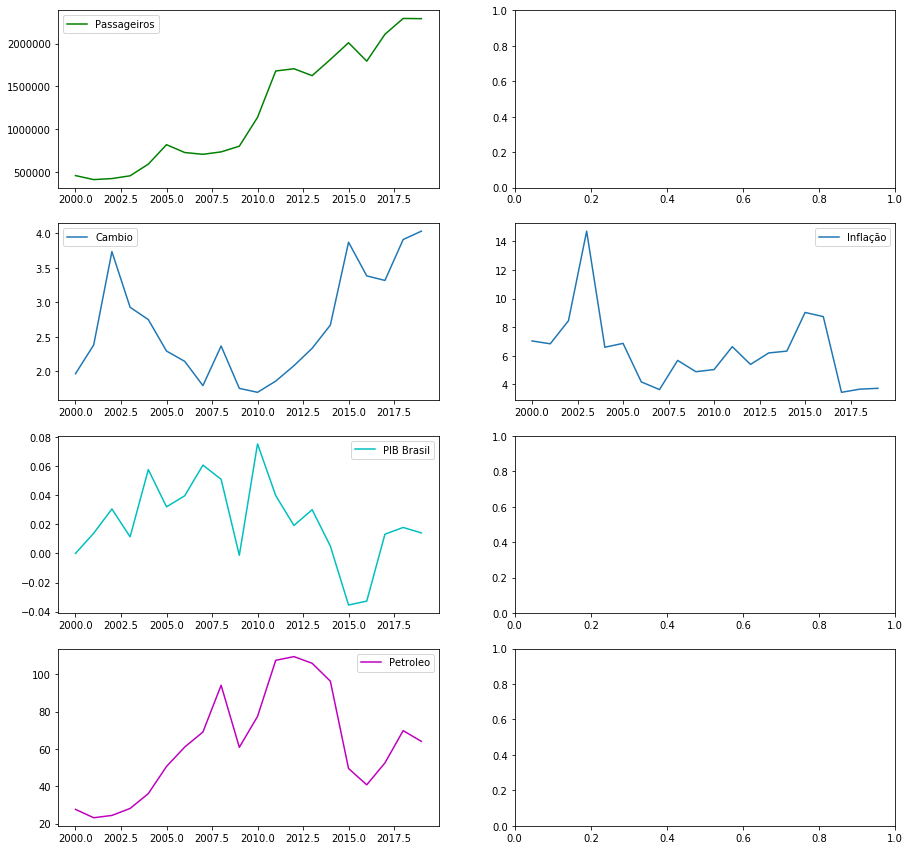

In [63]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_slz["Ano"], principal_slz["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[1,0].plot(principal_slz["Ano"], principal_slz["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_slz["Ano"], principal_slz["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal_slz["Ano"], principal_slz["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal_slz["Ano"], principal_slz["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()#

In [64]:
treino = principal_slz.loc[principal_slz["Ano"] < 2017]
teste = principal_slz.loc[principal_slz["Ano"] >= 2000]

In [65]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano"],axis=1).copy()

In [66]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [  276715.08493228    16470.96707676   323344.22383249   -25733.41870995
 -9860332.93402735]
-398071.40462019364
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 335332.7247735704


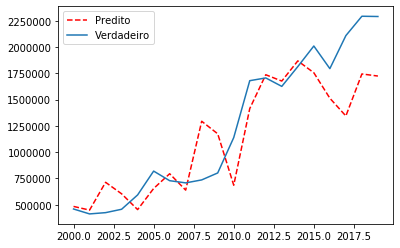

In [67]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_slz["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [68]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [69]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [70]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 247400.57833652597


In [71]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 335332.72477356973


In [72]:
import statsmodels.api as sm

#define response variable
y = principal_slz["Passageiros"].loc[principal_slz["Ano"]<2020]

#define predictor variables
x = principal_slz.drop(["Passageiros", "Ano"],axis=1).loc[principal_slz["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           3.67e-05
Time:                        19:42:29   Log-Likelihood:                -278.25
No. Observations:                  20   AIC:                             568.5
Df Residuals:                      14   BIC:                             574.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.766e+05   5.15e+05  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Comparação de passageiros nos aeroportos analisados

In [73]:
#plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
#plt.legend()
##
#plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
#plt.legend()
##
#plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
#plt.legend()
##
#plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
#plt.legend()
#
#plt.title("Voos Nacionais")
#plt.show()
#
#
#
#
#plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
#plt.legend()
#
#plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
#plt.legend()
#
#plt.title("Voos Internacionais")
#plt.show()